In [4]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')



# Create Point Cloud

Create a :class:`pyvista.PolyData` object from a point cloud of vertices and
scalar arrays for those points.


In [5]:
import numpy as np
import pyvista as pv
from pyvista import examples

Point clouds are generally constructed in the :class:`pyvista.PolyData` class
and can easiy have scalar/vector data arrays associated with the point
cloud. In this example, we'll work a bit backwards using a point cloud that
that is available from our ``examples`` module. This however is no different
than creating a PyVista mesh with your own NumPy arrays of vertice locations.



In [22]:
# Define some helpers - ignore these and use your own data!
def generate_points(subset=0.02):
    """A helper to make a 3D NumPy array of points (n_points by 3)"""
    dataset = examples.download_lidar()
    ids = np.random.randint(low=0, high=dataset.n_points-1,
                            size=int(dataset.n_points * subset))
    return dataset.points[ids]


points = np.random.rand(1000000, 3)
# Print first 5 rows to prove its a numpy array (n_points by 3)
# Columns are (X Y Z)
points[0:5, :]

array([[0.03907405, 0.20725184, 0.22914768],
       [0.48438275, 0.7081608 , 0.3083506 ],
       [0.21670465, 0.64552232, 0.27335087],
       [0.04443122, 0.81952057, 0.35368146],
       [0.0145774 , 0.99146337, 0.41447813]])

Now that you have a NumPy array of points/vertices either from our sample
data or your own project, creating a PyVista mesh of those points is simply:



In [23]:
point_cloud = pv.PolyData(points)
point_cloud

PolyData,Information
N Cells,1000000
N Points,1000000
X Bounds,"3.674e-07, 1.000e+00"
Y Bounds,"2.455e-07, 1.000e+00"
Z Bounds,"5.674e-07, 1.000e+00"
N Arrays,0


And we can even do a sanity check



In [24]:
np.allclose(points, point_cloud.points)

True

And now that we have a PyVista mesh, we can plot it. Note that we add an
option to use eye dome lighting - this is a shading technique to improve
depth perception with point clouds (learn more in `ref_edl`).



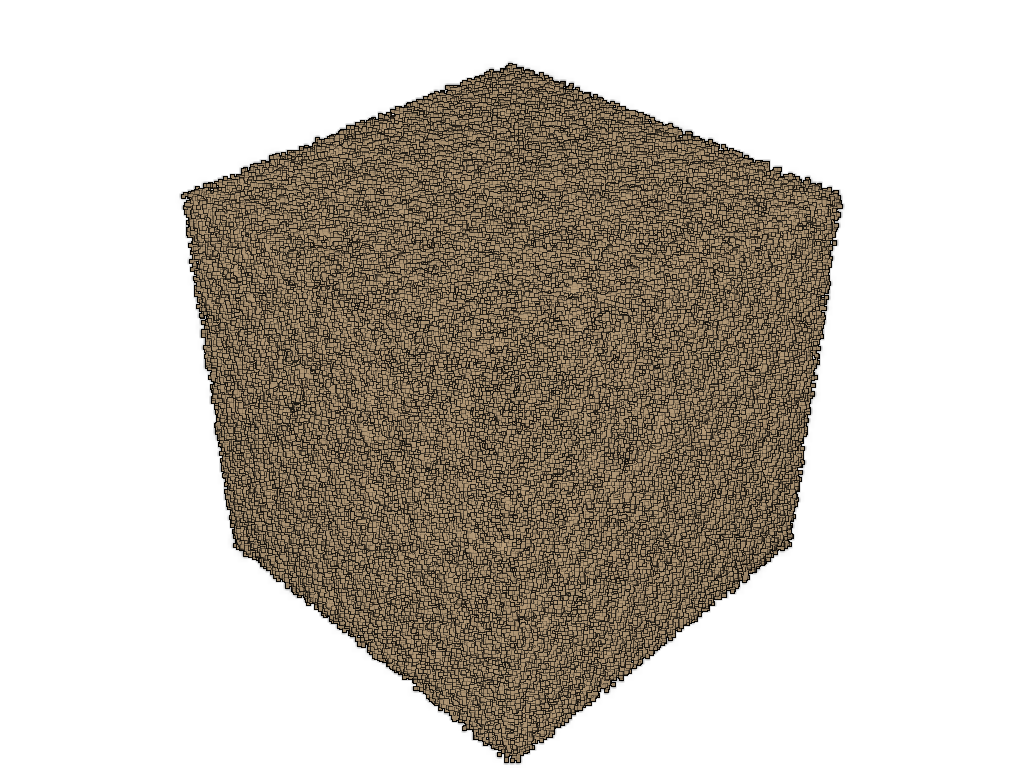

In [25]:
point_cloud.plot(eye_dome_lighting=True)

Now what if you have data attributes (scalar/vector arrays) that you'd like
to associate with every node of your mesh? You can easily add NumPy data
arrays that have a length equal to the number of points in the mesh along the
first axis. For example, lets add a few arrays to this new ``point_cloud``
mesh.

Make an array of scalar values with the same length as the points array.
Each element in this array will correspond to points at the same index:



In [10]:
# Make data array using z-component of points array
data = points[:,-1]

# Add that data to the mesh with the name "uniform dist"
point_cloud["elevation"] = data

And now we can plot the point cloud with that random data. PyVista is smart
enough to plot the scalar array you added by default. Note that this time,
we specify to render every point as its own sphere.



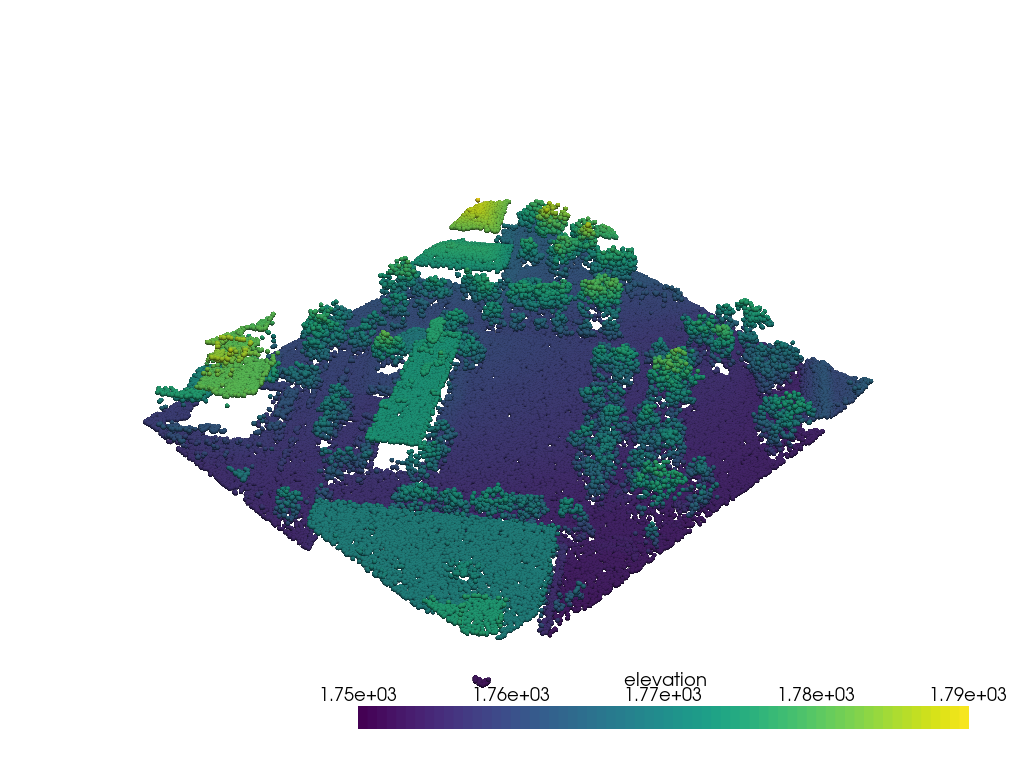

In [11]:
point_cloud.plot(render_points_as_spheres=True)

That data is kind of boring, right? You can also add data arrays with
more than one scalar value - perhaps a vector with three elements? Let's
make a little function that will compute vectors for every node in the point
cloud and add those vectors to the mesh.

This time, we're going to create a totally new, random point cloud.



In [15]:
# Create random XYZ points
points = np.random.rand(10000, 3)
# Make PolyData
point_cloud = pv.PolyData(points)


def compute_vectors(mesh):
    origin = mesh.center
    vectors = mesh.points - origin
    vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    return vectors

vectors = compute_vectors(point_cloud)
vectors[0:5, :]

pyvista_ndarray([[ 0.25834223, -0.72969453,  0.63309177],
                 [-0.76968072,  0.38297211,  0.51080715],
                 [-0.35363462,  0.67713859,  0.64531069],
                 [-0.82619581, -0.39506639, -0.40165038],
                 [ 0.65568262, -0.57794418,  0.48586092]])

In [16]:
point_cloud['vectors'] = vectors

Now we can make arrows using those vectors using the glyph filter
(see `glyph_example` for more details).



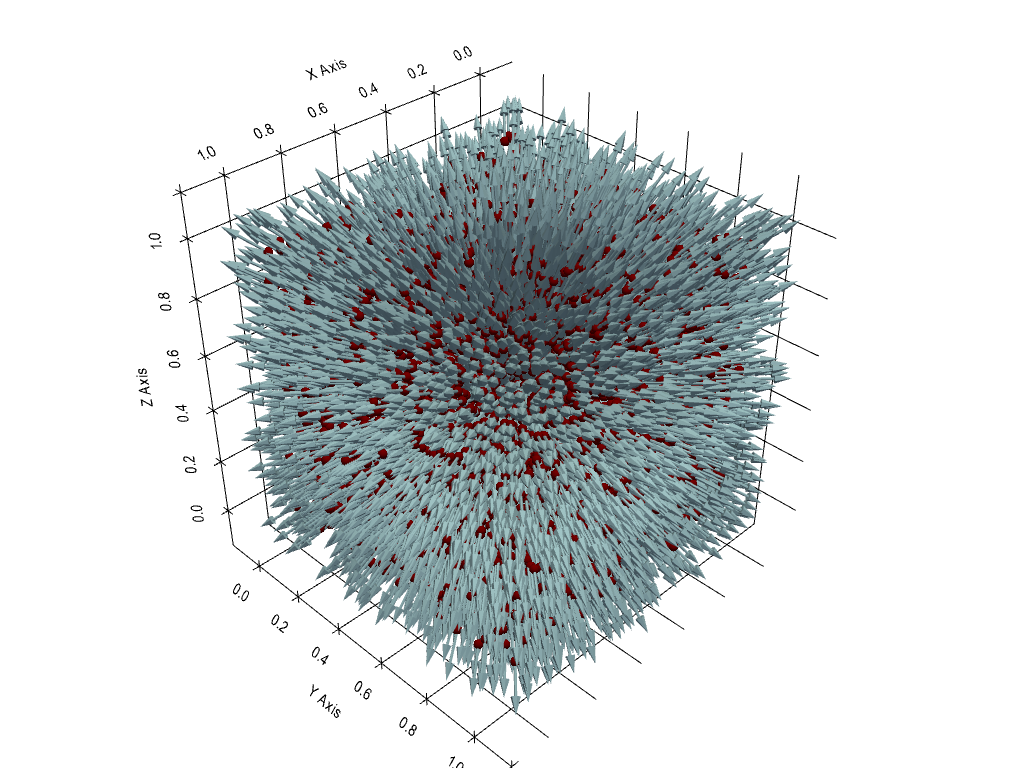

In [17]:
arrows = point_cloud.glyph(orient='vectors', scale=False, factor=0.15,)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=10.,
                 render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
# plotter.add_point_labels([point_cloud.center,], ['Center',],
#                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()